#                              Restaurant Revenue Prediction

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

# Importing the datasets

In [2]:
train_dataset = pd.read_csv('D:\\AdvancePython\\week2\\project1\\train.csv')
test_dataset = pd.read_csv('D:\\AdvancePython\\week2\\project1\\test.csv')

# Data Pre-processing

In [3]:
a=train_dataset["Open Date"].unique()
b=dict()
c=0
for i in a:
  b.update({i:c})
  c=c+1
train_dataset["Open Date"]=train_dataset["Open Date"].map(b)

a1=test_dataset["Open Date"].unique()
b1=dict()
c1=0
for i in a1:
  b1.update({i:c1})
  c1=c1+1
test_dataset["Open Date"]=test_dataset["Open Date"].map(b1)

In [4]:
a=train_dataset["Type"].unique()
b=dict()
c=0
for i in a:
  b.update({i:c})
  c=c+1
train_dataset["Type"]=train_dataset["Type"].map(b)

a1=test_dataset["Type"].unique()
b1=dict()
c1=0
for i in a1:
  b1.update({i:c1})
  c1=c1+1
test_dataset["Type"]=test_dataset["Type"].map(b1)

In [5]:
a=train_dataset["City Group"].unique()
b=dict()
c=0
for i in a:
  b.update({i:c})
  c=c+1
train_dataset["City Group"]=train_dataset["City Group"].map(b)

a1=test_dataset["City Group"].unique()
b1=dict()
c1=0
for i in a1:
  b1.update({i:c1})
  c1=c1+1
test_dataset["City Group"]=test_dataset["City Group"].map(b1)

In [6]:
a=train_dataset["City"].unique()
b=dict()
c=0
for i in a:
  b.update({i:c})
  c=c+1
train_dataset['City']=train_dataset["City"].map(b)

a1=test_dataset["City"].unique()
b1=dict()
c1=0
for i in a1:
  b1.update({i:c1})
  c1=c1+1
test_dataset['City']=test_dataset["City"].map(b1)

# Splitting Columns

In [7]:
x = train_dataset.iloc[:,:-1].values
y = train_dataset.iloc[:,-1].values

In [8]:
x1=test_dataset.iloc[:,:].values
print(x1.shape,x.shape,y.shape)

(100000, 42) (137, 42) (137,)


# Training the Simple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)


LinearRegression()

# Finding mean squared errror

In [10]:
y_pred = regressor.predict(x)
y_pred1 = regressor.predict(x1)
k = mse(y_pred, y)
k

4571979450827.97

# Predicting the Test set results

In [11]:
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1), y.reshape(len(y),1)),1)

array([[ 6105732.88,  5653753.  ],
       [ 5113456.77,  6923131.  ],
       [ 3206054.2 ,  2055379.  ],
       [ 3969054.14,  2675511.  ],
       [ 3272584.78,  4316715.  ],
       [ 6484102.52,  5017319.  ],
       [ 4914585.01,  5166635.  ],
       [ 4357477.26,  4491607.  ],
       [ 4052995.8 ,  4952497.  ],
       [ 2555168.69,  5444227.  ],
       [ 6574861.11,  3745135.  ],
       [ 4835190.  ,  5161370.  ],
       [ 2073748.98,  1734634.  ],
       [ 4495414.41,  4807746.  ],
       [ 1944393.98,  1999097.  ],
       [ 3784882.07,  3218918.  ],
       [ 6739515.74, 19696939.  ],
       [ 5230727.61,  8213524.  ],
       [ 3104180.25,  5337526.  ],
       [ 3585504.8 ,  2021934.  ],
       [ 7006918.81,  5525735.  ],
       [ 4605253.32,  1149870.  ],
       [ 3192217.84,  3956086.  ],
       [ 4728504.53,  2999068.  ],
       [ 6439042.58,  8904084.  ],
       [ 4167705.25,  3778621.  ],
       [ 4400407.74,  2267425.  ],
       [ 3898917.86,  5435276.  ],
       [ 3805382.12,

# Training the Polynomial Regression model on the whole dataset and finding mean squared error

In [19]:
from sklearn.preprocessing import PolynomialFeatures
p_reg = PolynomialFeatures(degree = 4)
X_poly = p_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_pred = lin_reg.predict(X_poly)
lin_mse = mse(y,lin_pred)
lin_mse

3.952026087138789e-09

# Training the Random Forest Regression model on the whole dataset and finding mean squared error

In [13]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor()
rand_reg.fit(x, y)
rand_pred = rand_reg.predict(x)
rand_pred1 = rand_reg.predict(x1)
rand_mse = mse(y,rand_pred)
rand_mse

858774668100.2616

# Finding Importance of each variable

In [14]:
f=train_dataset.drop('revenue', axis = 1)
f_list=list(f.columns)
importances = list(rand_reg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(f, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: P29                  Importance: 0.17
Variable: Id                   Importance: 0.11
Variable: Open Date            Importance: 0.09
Variable: City                 Importance: 0.08
Variable: P19                  Importance: 0.06
Variable: P28                  Importance: 0.05
Variable: P6                   Importance: 0.04
Variable: P20                  Importance: 0.04
Variable: P17                  Importance: 0.03
Variable: P22                  Importance: 0.03
Variable: P23                  Importance: 0.03
Variable: P1                   Importance: 0.02
Variable: P2                   Importance: 0.02
Variable: P8                   Importance: 0.02
Variable: P11                  Importance: 0.02
Variable: P12                  Importance: 0.02
Variable: P13                  Importance: 0.02
Variable: Type                 Importance: 0.01
Variable: P3                   Importance: 0.01
Variable: P4                   Importance: 0.01
Variable: P5                   Importanc

# Plotting importances versus variable graph

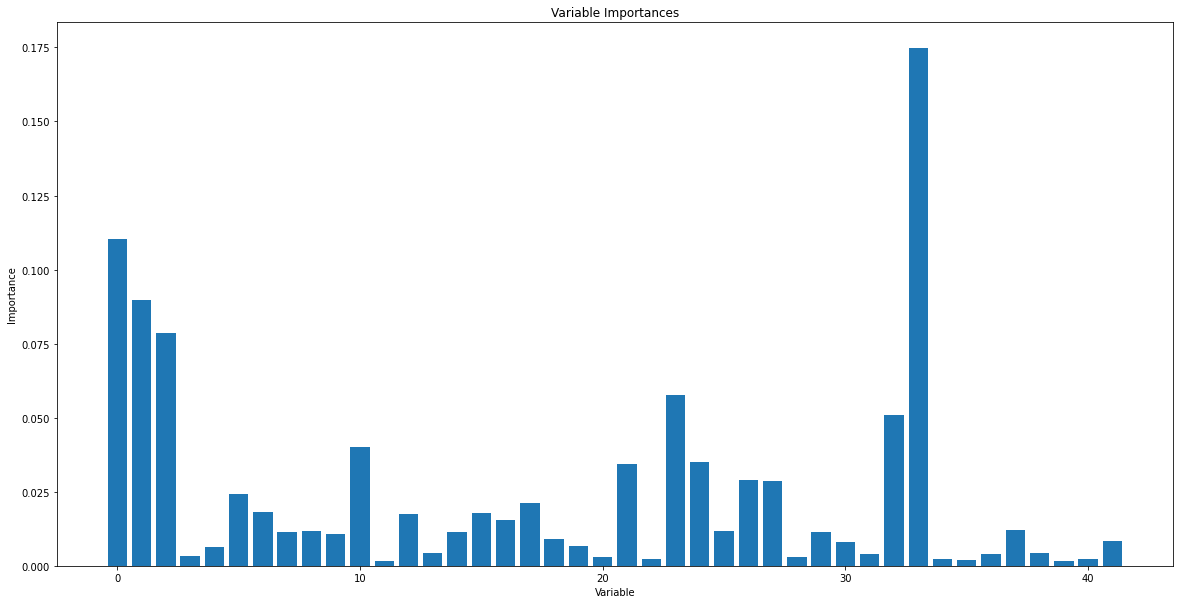

In [15]:
import matplotlib.pyplot as plt
x_values = list(range(len(importances)))
plt.figure(figsize = (20,10))
plt.bar(x_values, importances)
#plt.xticks(x_values,train_dataset.columns,rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Findind mean absolute error and accuracy

In [16]:
errors = abs(rand_pred-y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 601147.99 degrees.
Accuracy: 84.3 %.


In [17]:
rand_reg_most_important = RandomForestRegressor()
important_indices = [f_list.index('P29'), f_list.index('Id'), f_list.index('City'), f_list.index('Open Date')]
train_important = x[:,important_indices]
test_important = x1[:,important_indices]
rand_reg_most_important.fit(train_important, y)
predictions = rand_reg_most_important.predict(train_important)
errors = abs(predictions - y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 696223.43 degrees.
Accuracy: 80.74 %.


# Training the Decision Tree Regression model on the whole dataset and finding mean squared error

In [18]:
from sklearn.tree import DecisionTreeRegressor
d_reg = DecisionTreeRegressor()
d_reg.fit(x,y)
d_pred = d_reg.predict(x)
d_pred1=d_reg.predict(x1)
d_mse = mse(y,d_pred)
print(d_mse)

0.0
